<p> Classifier Performance Comparison with Kaggle Dataset </p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
# Load the dataset ()
data = pd.read_csv('WineQT.csv')
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid','chlorides']
X = data[selected_features] # Features
y = data['quality'] #target
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
# List of classifiers
classifiers = {
'SVM (Linear)': SVC(kernel='linear', random_state=42),
'SVM (Poly)': SVC(kernel='poly', random_state=42),
'SVM (RBF)': SVC(kernel='rbf', random_state=42),
'SVM (Sigmoid)': SVC(kernel='sigmoid', random_state=42),
'KNN': KNeighborsClassifier(),
'Decision Tree': DecisionTreeClassifier(random_state=42),
'MLPC': MLPClassifier(random_state=42),
'Naive Bayes': GaussianNB()
}
# Store metrics for each classifier
metrics = {
'Accuracy': [],
'Precision': [],
'Recall': [],
'F1 Score': []
}
for name, clf in classifiers.items():

# Train classifier
  clf.fit(X_train_std, y_train)
# Predict
  y_pred = clf.predict(X_test_std)
# Calculate metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  metrics['Accuracy'].append(accuracy)
  metrics['Precision'].append(precision)
  metrics['Recall'].append(recall)
  metrics['F1 Score'].append(f1)
# Print metrics
for metric_name, metric_values in metrics.items():
  print(f"{metric_name}:")
  for classifier_name, value in zip(classifiers.keys(), metric_values):

    print(f"{classifier_name}: {value:.4f}")
  print()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

Accuracy:
SVM (Linear): 0.4985
SVM (Poly): 0.4461
SVM (RBF): 0.4869
SVM (Sigmoid): 0.4111
KNN: 0.4227
Decision Tree: 0.5248
MLPC: 0.4752
Naive Bayes: 0.4636

Precision:
SVM (Linear): 0.4196
SVM (Poly): 0.3664
SVM (RBF): 0.4070
SVM (Sigmoid): 0.3881
KNN: 0.3915
Decision Tree: 0.5352
MLPC: 0.4514
Naive Bayes: 0.4644

Recall:
SVM (Linear): 0.4985
SVM (Poly): 0.4461
SVM (RBF): 0.4869
SVM (Sigmoid): 0.4111
KNN: 0.4227
Decision Tree: 0.5248
MLPC: 0.4752
Naive Bayes: 0.4636

F1 Score:
SVM (Linear): 0.4557
SVM (Poly): 0.3888
SVM (RBF): 0.4418
SVM (Sigmoid): 0.3895
KNN: 0.4002
Decision Tree: 0.5288
MLPC: 0.4508
Naive Bayes: 0.4633



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true sa

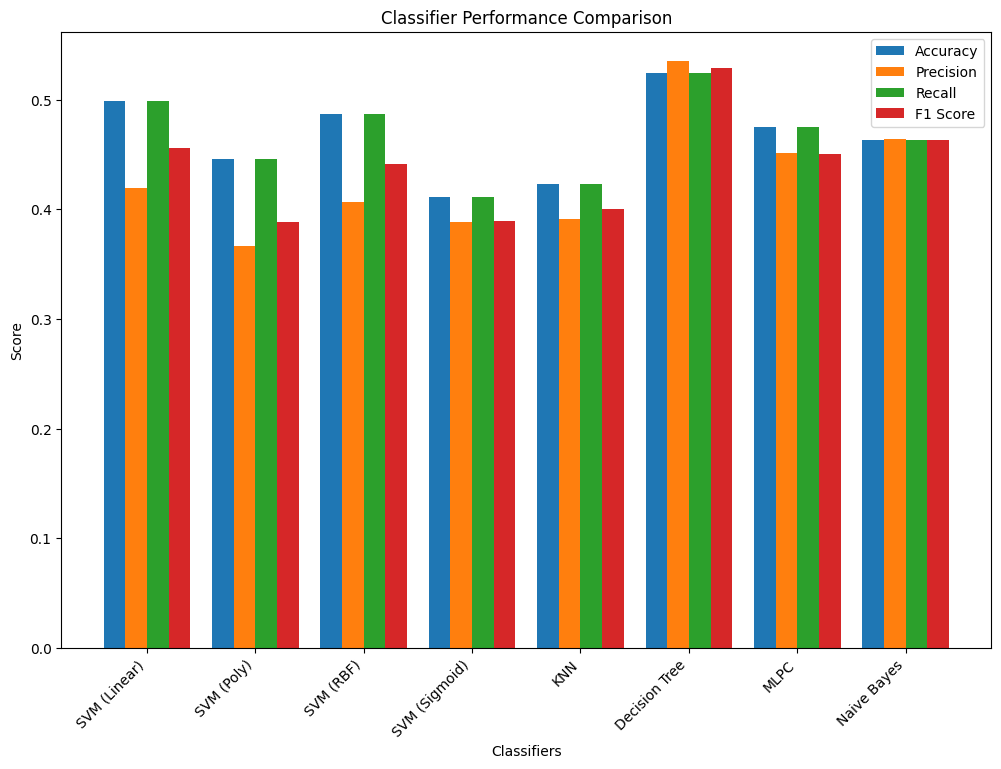

In [4]:
# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = np.arange(len(classifiers))
for i, (metric_name, metric_values) in enumerate(metrics.items()):
  plt.bar(index + i * bar_width, metric_values, bar_width, label=metric_name)

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Classifier Performance Comparison')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, classifiers.keys(), rotation=45, ha='right')
plt.legend()
plt.show()
